# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
print(df.describe())
print(df.head())

       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


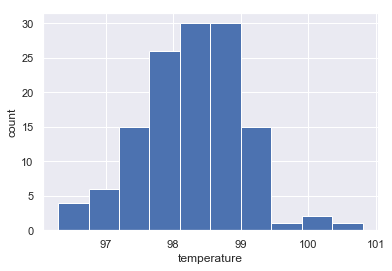

In [3]:
_ = plt.hist(df['temperature'])
_ = plt.xlabel('temperature')
_ = plt.ylabel('count')
plt.show()

In [4]:
import numpy as np

In [5]:
# Creating samples with given sample mean and std assuming normal distribution
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
samples = np.random.normal(mean, std, size = 10000)
# plt.hist(samples)
# plt.show()

In [6]:
# Function for computing ECDF
def ecdf(data):
    n = len(data) # no of data points
    x = np.sort(data)
    y = np.arange(1, n + 1)/n
    return x, y

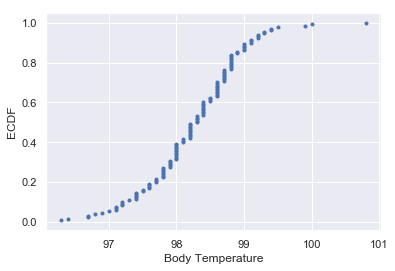

In [7]:
# Plotting ECDF of body temperatures
x_temp, y_temp = ecdf(df.temperature)
plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')
plt.xlabel('Body Temperature')
plt.ylabel('ECDF')
plt.show()

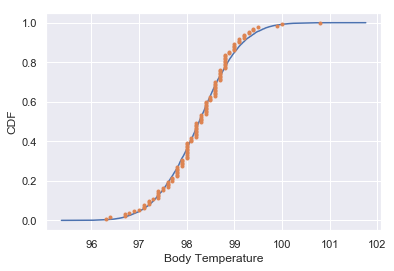

In [8]:
# Comparing ECDF of samples with theoretical normal distribution ECDF using sample mean and std
x_theor, y_theor = ecdf(samples)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('CDF')
plt.show()

The CDF plot above seems to suggest our sample is normally distributed.

In [9]:
# Test of normality by non-graphical methods
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

#### Is the distribution of body temperatures normal? 

Looking at the combination of the CDF and the p-value obtained above, we cannot reject the null hypothesis and therefore there is a significant probability that the sample is normally distributed.

In [10]:
df.describe().round(2)

,temperature,heart_rate
count,130.00,130.00
mean,98.25,73.76
std,0.73,7.06
min,96.30,57.00
25%,97.80,69.00
50%,98.30,74.00
75%,98.70,79.00
max,100.80,89.00


#### Is the sample size large? Are the observations independent?

Yes the sample is large enough (> 30). Also the observations are independent as every row represents one person.

#### Is the true population mean really 98.6 degrees F?

We state the null hypothesis that the true population mean is equal to 98.6 degrees F. We will reject the null hypothesis if p < 0.05.

In [11]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [12]:
# Bootstrap hypothesis test
translated_mean = np.array(df['temperature'] - np.mean(df['temperature']) + 98.6) # Assuming mean of sample is 98.6
bs_replicates = draw_bs_reps(translated_mean, np.mean, 10000) # Taking 10000 bootstrap replicates of mean
p = np.sum(bs_replicates <= np.mean(df['temperature']))/10000 # Computing fraction of replicates less than sample mean
print(p.round(5))

0.0


Since the p-value is less than 0.05, we can reject the null hypothesis using the bootstrap hypothesis that the mean of the population is 98.6.

In [13]:
# Using frequentist stats approach
sd_population = df['temperature'].std()
print(sd_population)

0.7331831580389454


#### In this situation, is it appropriate to use the $t$ or $z$ statistic? 
- It would be appropriate to use the z-statistic as sample size is large (>30)

In [14]:
# Calculating standard deviation of sample from estimated standard deviation of population
import math
sd_sample = sd_population/ math.sqrt(df['temperature'].size)
print(sd_sample)

0.06430441683789101


In [15]:
# Computing 99% confidence interval of population mean
alpha = 1 - (99/100) 
critical_prob = 1 - (alpha/2) # Critical probability
# print(stats.norm.ppf(critical_prob))
moe = stats.norm.ppf(critical_prob) * sd_sample # Margin of error
# print(moe)
conf_interval_high = df['temperature'].mean() + moe # Confidence interval
conf_interval_low = df['temperature'].mean() - moe
print(conf_interval_low.round(2), conf_interval_high.round(2))

98.08 98.41


#### At what temperature should we consider someone's temperature to be "abnormal"?

In [34]:
# If the temperature falls outside the 95% confidence interval we should consider a person's temperature
# to be abnormal.

bs_temp_replicates = draw_bs_reps(df['temperature'], np.mean, size = 10000) # Array of 10000 means

conf_int = np.percentile(bs_temp_replicates, [2.5, 97.5]) # Calculating 95% confidence interval

print('95% confidence interval = ', conf_int, 'degrees F')

# We can say with 95% confidence that the normal body temperature should fall between 98.12 and 98.37 degrees F.
# Hence we can conclude that if an individual's body temperature is less than 98.12 or greater than 98.37, their temperature 
# would be abnormal.

95% confidence interval =  [98.12538462 98.37615385] degrees F


#### Is there a significant difference between males and females in normal temperature?

In [22]:
df_males = df[df['gender'] == 'M'] # dataset with only males
# print(df_males)

df_females = df[df['gender'] == 'F'] # Only females
# print(df_females)

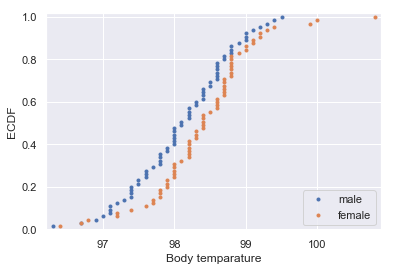

In [35]:
temp_males = df_males['temperature'] # Data with only male temperatures
temp_females = df_females['temperature'] # Only female temperatures

# Using exploratory methods to see if there is any difference in means, compute the ECDF

x_males, y_males = ecdf(temp_males) # ECDF of male temps
x_females, y_females = ecdf(temp_females) # ECDF of female temps

# Plot the ECDFs
_ = plt.plot(x_males, y_males, marker='.', linestyle='none')
_ = plt.plot(x_females, y_females, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('Body temparature')
_ = plt.ylabel('ECDF')
_ = plt.legend(('male', 'female'), loc='lower right')

# Show the plot
plt.show()

# The ECDF comparison plot below indicates that there may be a significant difference between mean of normal temperatures
# between males and females

In [45]:
# Using the two samples bootstrap hypothesis approach we will test the hypothesis that 
# there is no difference between normal temperature in males and females

mean_temps = np.mean(df['temperature'])

# Shifting temps of males and females such that mean of each set is equal to sample mean
mean_temps_male_shifted = temp_males - np.mean(temp_males) + mean_temps
mean_temps_female_shifted = temp_females - np.mean(temp_females) + mean_temps

bs_replicates_male = draw_bs_reps(mean_temps_male_shifted, np.mean, size = 10000) # Compute 10000 replicates for mean of male temps
bs_replicates_female = draw_bs_reps(mean_temps_female_shifted, np.mean, size = 10000) # Compute 10000 replicates for mean of female temps 

bs_replicates = bs_replicates_male - bs_replicates_female # Replicates of difference of means

p = np.sum(bs_replicates == 0) / len(bs_replicates)
print('p-value =', p)

# Looking at the p-value we can see that the p-value is so small that we can reject the null hypothesis 
# and conclude that there is a significant difference between normal temperatures for males and females.

p-value = 0.0


In [31]:
# Assuming null hypothesis of means being equal we use the two sample t-test to check for difference between means

stats.ttest_ind(temp_males, temp_females)

# Since the p-value obtained is less than 5%, we can reject the null hypothesis that the two samples have equal means
# which implies that there is a significant difference between males and females in normal temperature

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)